In [16]:
from sklearn import ensemble, cross_validation, learning_curve, metrics 

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
from sklearn.datasets import load_digits
data, target = load_digits(return_X_y=True)


In [19]:
print data.shape,target.shape

(1797, 64) (1797,)


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [22]:
clf = DecisionTreeClassifier(random_state=0)

In [23]:
#Задание 1
cross_validation.cross_val_score(clf, data, target, cv=10).mean()

0.83033372347388534

In [24]:
#Задание 2
cross_validation.cross_val_score(BaggingClassifier(base_estimator = clf, n_estimators =100), data, target, cv=10).mean()

0.92879805178131181

In [25]:
from math import sqrt

In [26]:
#Задание 3
cross_validation.cross_val_score(BaggingClassifier(base_estimator = clf, n_estimators =100, max_features = int(math.sqrt(data.shape[1]))), data, target, cv=10).mean()

0.93097098528984024

In [28]:
clf1 = DecisionTreeClassifier(random_state=0, max_features = int(math.sqrt(data.shape[1])))

In [29]:
#Задание 4
cross_validation.cross_val_score(BaggingClassifier(base_estimator = clf1, n_estimators =100), data, target, cv=10).mean()

0.95612103415107552

In [31]:
#Задание 5
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators =200)
cross_validation.cross_val_score(rfc, data, target, cv=10).mean()

0.95055716736497153

In [33]:
rfc = RandomForestClassifier(n_estimators =1000)
cross_validation.cross_val_score(rfc, data, target, cv=10).mean()

0.95278040188376723

In [34]:
rfc = RandomForestClassifier(n_estimators =5)
cross_validation.cross_val_score(rfc, data, target, cv=10).mean()

0.88208699307482541

In [49]:
data.shape

(1797, 64)

In [35]:
rfc = RandomForestClassifier(n_estimators =15, max_depth =4)
cross_validation.cross_val_score(rfc, data[:,:10], target, cv=10).mean()

0.40994273756389427

In [36]:
trees = [5,10,15,100,200,500,700,1000]
#trees =[5]
results = []
for tree in trees:
    rfc = RandomForestClassifier(n_estimators = tree)
    x = cross_validation.cross_val_score(rfc, data, target, cv=10).mean()
    results.append(x)

In [38]:
print results

[0.8791888425587423, 0.92039192564172956, 0.92830175506802193, 0.95277621841541627, 0.95281036734695645, 0.94945573673730232, 0.95058135724177739, 0.95165960909365865]


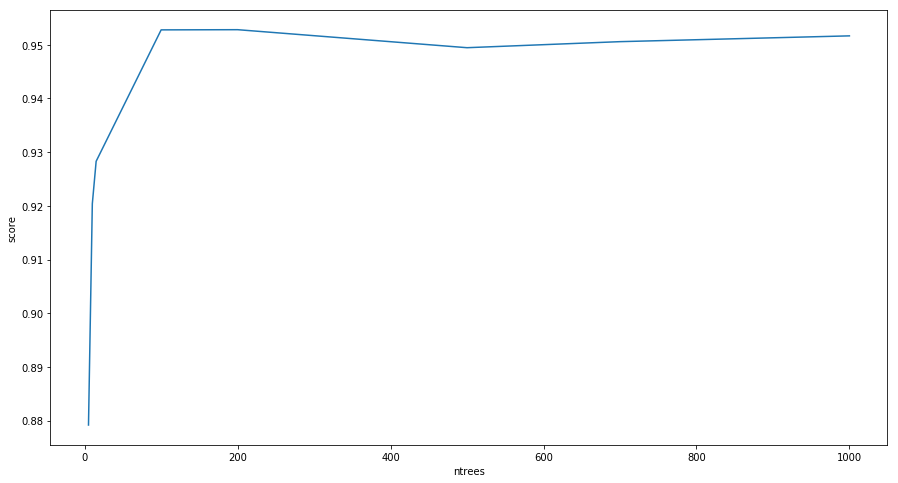

In [39]:
plt.figure(figsize = (15,8))
plt.plot(trees,results)
plt.xlabel('ntrees')
plt.ylabel('score')
plt.show()

In [40]:
features = np.arange(5,60,5)
#features = [5]
results1 = []
for feature in features:
    rfc = RandomForestClassifier(max_features = feature, n_estimators = 15)
    x1 = cross_validation.cross_val_score(rfc, data, target, cv=10).mean()
    results1.append(x1)


In [41]:
results1

[0.93206732299748507,
 0.93377977951114965,
 0.93042894063682335,
 0.92599014433914884,
 0.93380075467815504,
 0.9282381208519862,
 0.92873139126031656,
 0.92105721404507057,
 0.92447752578392206,
 0.92108775488819372,
 0.92059076529690742]

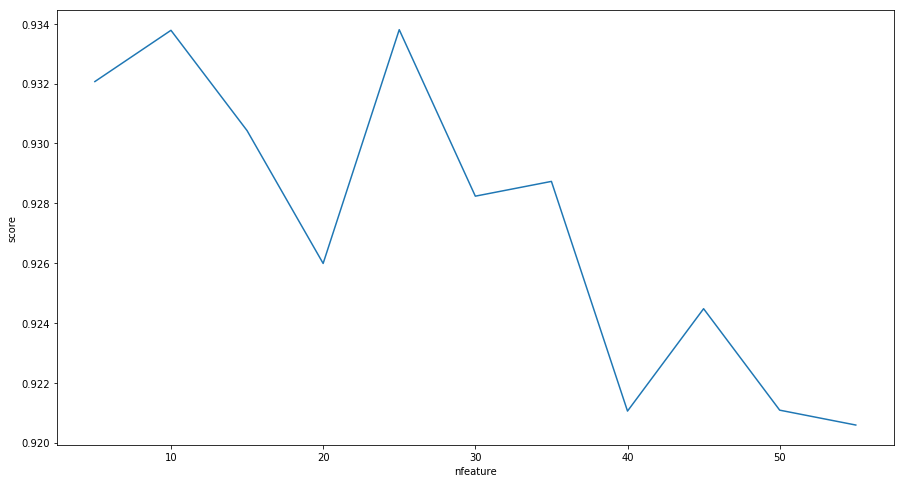

In [42]:
plt.figure(figsize = (15,8))
plt.plot(features,results1)
plt.xlabel('nfeature')
plt.ylabel('score')
plt.show()

In [43]:
max_dep = [5, 10, 20, 30, 50, 70, 100, None]
results2 = []
for depth in max_dep:
    print depth
    rfc = RandomForestClassifier(max_features = 10, n_estimators = 15, max_depth = depth)
    x2 = cross_validation.cross_val_score(rfc, data, target, cv=10).mean()
    results2.append(x2)

5
10
20
30
50
70
100
None


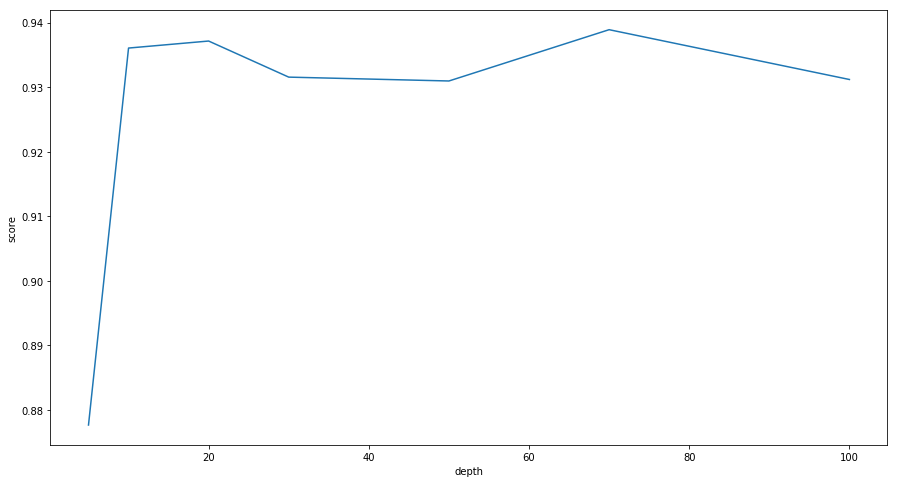

In [44]:
plt.figure(figsize = (15,8))
plt.plot(max_dep,results2)
plt.xlabel('depth')
plt.ylabel('score')
plt.show()